In [1]:
import os, json, hashlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [131]:
from matplotlib.offsetbox import AnchoredText

In [2]:
def load_json(path):
    with open(path) as json_data:
        file_contents = json_data.read()
        payload = json.loads(file_contents)
        json_data.close()
        return payload

In [3]:
def hash_dict(data_dict):
    json_str = json.dumps(data_dict, sort_keys=True)
    return hashlib.sha256(json_str.encode()).hexdigest()

In [4]:
def pprint(data_dict):
    print(json.dumps(data_dict, indent=4))

In [6]:
def general_graphs(dataframe, metrics, base_path):

    # CREATE SUBPLOTS
    size_factor = 0.6
    df_keys = list(dataframe.keys())
    
    fig = plt.figure(figsize=(18*size_factor, (len(df_keys)*5)*size_factor))
    gs = fig.add_gridspec(len(df_keys), 1)

    for nth, key in enumerate(df_keys):

        # CREATE THE NEW AXIS
        axis = fig.add_subplot(gs[nth, 0])

        # EXTRACT LABELS AND VALUES FROM DF
        labels = [float(x) for x in list(dataframe[key].to_dict().keys())]
        values = [float(x) for x in list(dataframe[key].to_dict().values())]

        # PLOT DATA & SET TITLE
        axis.plot(labels, values)
        axis.set_title(key, fontsize=8)

        text_box = AnchoredText(json.dumps(metrics[key], indent=4), frameon=True, loc=4, pad=0.5, prop=dict(fontsize=8))
        plt.setp(text_box.patch, facecolor='wheat', alpha=0.5)
        axis.add_artist(text_box)

    # CONFIG EACH AXIS
    for ax in fig.axes:
        ax.margins(x=0)
        ax.grid(alpha=0.3)
        ax.set_facecolor("#F7F7F7")
        ax.tick_params(axis='both', which='major', labelsize=8)
        
    plt.tight_layout()

    # GENERATE IMAGE LAYOUT
    img_prefix = '/'.join(base_path.split('/')[0:2]) + '/screenshots'
    img_name = base_path.split('/')[-1]

    # CREATE SCREENSHOT DIR IF IT DOESNT EXIST
    if not os.path.exists(img_prefix):
        os.mkdir(img_prefix)
    
    plt.savefig(f'{img_prefix}/{img_name}.pdf', format="pdf", bbox_inches='tight')
    #plt.show()
    plt.close()

In [7]:
def find_statics(base_path):

    # CONTAINERS
    metrics = {}
    values = {}
    
    # FETCH ALL METRICS DIR NAMES, IN ALPHABETICAL ORDER
    json_batches = os.listdir(base_path)
    json_batches.sort()
    
    # LOOP THROUGH BATCH FILES
    for batch in json_batches:
        json_file = load_json(f'{base_path}/{batch}')
        
        for item in json_file['data']['result']:
            hash_id = hash_dict(item['metric'])
            values_dict = dict(item['values'])

            if hash_id not in metrics:
                metrics[hash_id] = item['metric']

            if hash_id not in values:
                values[hash_id] = values_dict
            else:
                values[hash_id].update(values_dict)

    # CREATE DATAFRAME FROM VALUES DICT
    values_df = pd.DataFrame(values)

    # CREATE SCREENSHOT DIR IF IT DOESNT EXIST*
    if not os.path.exists(img_prefix):
        os.mkdir(img_prefix)
    
    general_graphs(values_df, metrics, base_path)
    
    return metrics, values_df

In [8]:
def analyze_all(exp_ts):
    metrics = os.listdir(f'snapshots/{exp_ts}')

    for metric in metrics:
        metrics, values_df = find_statics(f'snapshots/{exp_ts}/{metric}')

In [9]:
analyze_all(1706192253)

ValueError: Image size of 1080x96300 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7fd50f073010> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1080x96300 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1080x96300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x96300 with 321 Axes>

In [10]:
2**16

65536

In [83]:
metrics, df = find_statics(f'snapshots/1706192253/kepler_container_joules_total')

In [84]:
df.head()

,100be568791de674d2c99e43187990e83ace9d941c5d5c557c9b880c26d92afe,9ac33111fdb33a864de91e660cf403fb22d891b32a2ccf1c8a300f138d7dcf70,bed259473b28ee6db3f7121cd274ae28802be448f36066702fb2f784f1c84b11,0be7f870f756a396ce0482726803d3818dee4b4392cc849e90cb86f6fe4d787d,b8d3818ae37309620f0d79125cc81030f2bbbfe9a67a511de113ea342f035a0d,4285a12a009158f5b608f4266a4ee6295808a9ecef1f59f6049f3831869b0b90,a8d9a0f0c3cc933f0642a278e3ae0541e3accd11f722e1756d8f9a05aac8ee31,33f22cadf774735488ef2236b17669fd4c45d475c33159fe0032f9ed87095bf8,f17ce0a53ee239de8bc0016e48d4c1e5f79cd1bfafb09076dec273a8ccbf9d1f,cc071f69c6eff2cdb9648adfdc6e67fe67b0abea2cc4645f0b125b23ef073f62,...,b868a4d4af20d101a0224ecc48ef442fb5a7c55ccf65460b7c1d65a99425881a,155353070a44d422559f93b400a5dcd5a128a60f9a10f072512625469624336f,df5fd177eec5d52986b1ffadcb1060532fd004279c5bc4fbb12981131fed0a74,cf9f5ea294fed8b400b9023a20bd188e733ed54a60f50c9a0a849e0487d3eaa0,cb3a41384471f913f02c66670d92ea07fdbb23c05d75fcb53f88e31b43ce4291,ce1a574ea9390a414ca6e73f4435fb4d5545e3ff214bcc97f1619f1c8133092c,bb02a9833b4245e83723d562ba63ef56b101b5e9238a560f1ee03328b99158b2,97f55cce0c0e01b57c7a399dc2f224f8ef56feb578d65b3fa04afffa6a9b582b,56f449cbd85ee3564333629043d8374c0c5740b1cd6060d0a952c7c647caec24,f842d7789b3d228d5b6e9c4817894ffe2d100cc51e69d9540916fad9d4b8b8b2
1706130788,0,0,12,45,8232393,3586989,41005200,71369034,916422,4450359,...,300675135,605290734,441394380,247754994,372368826,387646014,464266083,406875909,406372671,405727896
1706130793,0,0,12,45,8232393,3586989,41005428,71369106,916425,4450395,...,300678867,605291790,441397320,247755882,372374616,387647298,464272401,406877481,406375179,405728688
1706130798,0,0,12,45,8232393,3586989,41006088,71369298,916440,4450431,...,300683772,605293920,441402333,247757556,372382059,387648483,464280255,406879254,406381713,405730584
1706130803,0,0,12,45,8232576,3587007,41006487,71369697,916443,4450440,...,300691398,605296137,441407865,247758741,372384174,387649293,464282727,406880049,406387536,405732498
1706130808,0,0,12,45,8232576,3587007,41006646,71369793,916449,4450464,...,300694164,605297265,441410073,247759449,372390015,387650547,464288604,406881612,406390542,405733386


In [89]:
list(df['a8d9a0f0c3cc933f0642a278e3ae0541e3accd11f722e1756d8f9a05aac8ee31'].isna().to_list())

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [130]:
def visualize(key, dataframe, metrics, img_path):

    # CREATE SUBPLOTS
    size_factor = 0.6
    
    fig = plt.figure(figsize=(18*size_factor, 6*size_factor))
    gs = fig.add_gridspec(1, 1)

    # CREATE THE NEW AXIS
    axis = fig.add_subplot(gs[0, 0])

    # EXTRACT LABELS AND VALUES FROM DF
    labels = [float(x) for x in list(dataframe[key].to_dict().keys())]
    values = [float(x) for x in list(dataframe[key].to_dict().values())]

    # FIND ALL NAN VALEUS
    nan_values = list(dataframe[dataframe[key].isnull()][key].keys())

    # PLOT DATA & SET TITLE
    axis.plot(labels, values)
    axis.set_title(f'HASH ID: {key}', fontsize=8)

    for index in nan_values:
        plt.axvline(x=index, color='r')

    #text_box = AnchoredText(json.dumps(metrics[key], indent=4), frameon=True, loc=-3, pad=0.5, prop=dict(fontsize=8))
    #plt.setp(text_box.patch, facecolor='wheat', alpha=0.5)
    #axis.add_artist(text_box)

    # CONFIG EACH AXIS
    for ax in fig.axes:
        ax.margins(x=0)
        ax.grid(alpha=0.3)
        ax.set_facecolor("#F7F7F7")
        ax.tick_params(axis='both', which='major', labelsize=8)

    text_str = json.dumps(metrics[key], indent=4) + '\n\n NaNs FOUND: ' + str(len(nan_values))
    fig.text(0.058, 0, text_str, ha='left', va='top', fontsize=8, bbox=dict(facecolor='wheat', alpha=0.8))
        
    plt.tight_layout()    
    plt.savefig(f'{img_path}/{key}.pdf', format="pdf", bbox_inches='tight')
    #plt.show()
    plt.close()

In [14]:
pprint(metrics)

NameError: name 'metrics' is not defined

In [110]:
pprint(stats)

{
    "dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288": {
        "11759": 5283,
        "11733": 249,
        "11703": 198,
        "11235": 3,
        "11001": 3,
        "11079": 3,
        "11625": 3,
        "11312": 3,
        "11157": 3,
        "11390": 3,
        "11469": 3,
        "11547": 3,
        "11677": 3,
        "10923": 1
    }
}


In [ ]:
values_df['dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288'].value_counts().to_dict()

In [21]:
import matplotlib.pyplot as plt

In [ ]:
values_df['dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288'].to_dict()

In [118]:
keys = list(values_df['dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288'].to_dict().keys())
values = list(values_df['dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288'].to_dict().values())

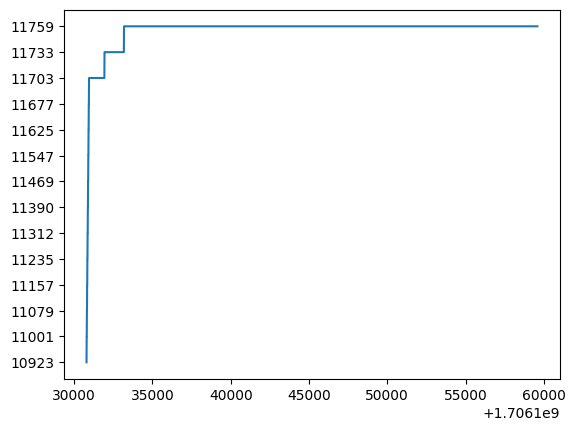

In [119]:
plt.plot(keys, values)

In [22]:
min(values)

'10010598828'

In [23]:
max(values)

'9983024796'

In [25]:
values[0]

'71'

In [28]:
values[-1]

'80999263836'

In [36]:
np.linspace(values[0], values[-1])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

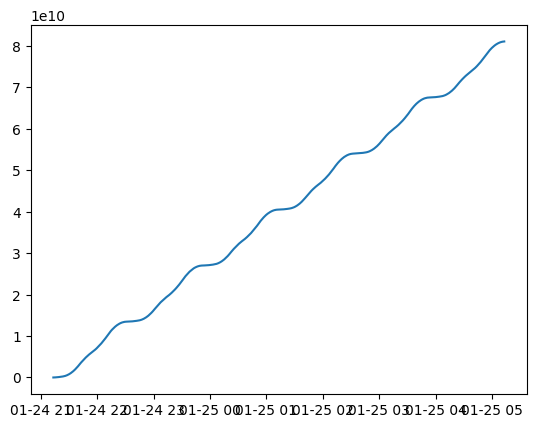

In [48]:
foob = lambda ts: datetime.utcfromtimestamp(int(ts))# .strftime('%Y-%m-%d %H:%M:%S')

labels = [foob(x) for x in list(values_df['d9a0e7b66549e2a871e3d8de7f7874ac747f0088847459940b8fe05b18c65a49'].to_dict().keys())]
values = [int(x) for x in list(values_df['d9a0e7b66549e2a871e3d8de7f7874ac747f0088847459940b8fe05b18c65a49'].to_dict().values())]

plt.plot(labels, values)

plt.show()

In [46]:
foob = lambda ts: datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d %H:%M:%S')

In [47]:
foob(1706159573)

'2024-01-25 05:12:53'

In [22]:
def general_graphs(dataframe, metrics):

    # CREATE SUBPLOTS
    size_factor = 0.6
    df_keys = list(dataframe.keys())
    
    fig = plt.figure(figsize=(18*size_factor, (len(df_keys)*5)*size_factor))
    gs = fig.add_gridspec(len(df_keys), 1)

    for nth, key in enumerate(df_keys):

        # CREATE THE NEW AXIS
        axis = fig.add_subplot(gs[nth, 0])

        # EXTRACT LABELS AND VALUES FROM DF
        labels = list(dataframe[key].to_dict().keys())
        values = list(dataframe[key].to_dict().values())

        # PLOT DATA & SET TITLE
        axis.plot(labels, values)
        axis.set_title(key)

        # ADD TEXTBOX WITH JSON PROPS
        axis.text(
            0.5, 0.5, 
            json.dumps(metrics[key], indent=4),
            transform=axis.transAxes, 
            fontsize=8, 
            ha='left', 
            va='center', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.2)
        )

    # CONFIG EACH AXIS
    for ax in fig.axes:
        ax.margins(x=0)
        ax.grid(alpha=0.3)
        ax.set_facecolor("#F7F7F7")
        
    plt.tight_layout()
    plt.savefig(f'KEPLER.png')
    #plt.show()

In [ ]:
general_graphs(values_df, metrics)

In [ ]:
# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Set the number of desired y-axis ticks
desired_ticks = 5

# Calculate the positions of the ticks based on the data range
tick_positions = np.linspace(min(y), max(y), desired_ticks)

In [ ]:
dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288

In [83]:
values

,dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288
1706130788,10923
1706130793,11001
1706130798,11001
1706130803,11001
1706130808,11079
...,...
1706159568,11759
1706159573,11759
1706159578,11759
1706159583,11759


In [6]:
metrics_list = os.listdir('snapshots/1706192253')
metrics_list.sort()

In [7]:
metrics_list

[':node_memory_MemAvailable_bytes:sum',
 'ALERTS',
 'ALERTS_FOR_STATE',
 'access_evaluation_duration_bucket',
 'access_evaluation_duration_count',
 'access_evaluation_duration_sum',
 'access_permissions_duration_bucket',
 'access_permissions_duration_count',
 'access_permissions_duration_sum',
 'aggregator_discovery_aggregation_count_total',
 'aggregator_unavailable_apiservice',
 'aggregator_unavailable_apiservice_total',
 'apiextensions_openapi_v2_regeneration_count',
 'apiextensions_openapi_v3_regeneration_count',
 'apiserver_admission_controller_admission_duration_seconds_bucket',
 'apiserver_admission_controller_admission_duration_seconds_count',
 'apiserver_admission_controller_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_bucket',
 'apiserver_admission_step_admission_duration_seconds_count',
 'apiserver_admission_step_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_summary',
 'apiserver_admission_step

In [9]:
foo = os.listdir('snapshots/1706192253/access_evaluation_duration_count')
foo.sort()

In [10]:
foo

['1706130788-1706132788.json',
 '1706132788-1706134788.json',
 '1706134788-1706136788.json',
 '1706136788-1706138788.json',
 '1706138788-1706140788.json',
 '1706140788-1706142788.json',
 '1706142788-1706144788.json',
 '1706144788-1706146788.json',
 '1706146788-1706148788.json',
 '1706148788-1706150788.json',
 '1706150788-1706152788.json',
 '1706152788-1706154788.json',
 '1706154788-1706156788.json',
 '1706156788-1706158788.json',
 '1706158788-1706159588.json']

In [23]:
res = load_json('snapshots/1706192253/access_evaluation_duration_count/1706130788-1706132788.json')

In [28]:
target = res['data']['result'][0]

In [32]:
dict(target['values'])

{1706130788: '10923',
 1706130793: '11001',
 1706130798: '11001',
 1706130803: '11001',
 1706130808: '11079',
 1706130813: '11079',
 1706130818: '11079',
 1706130823: '11157',
 1706130828: '11157',
 1706130833: '11157',
 1706130838: '11235',
 1706130843: '11235',
 1706130848: '11235',
 1706130853: '11312',
 1706130858: '11312',
 1706130863: '11312',
 1706130868: '11390',
 1706130873: '11390',
 1706130878: '11390',
 1706130883: '11469',
 1706130888: '11469',
 1706130893: '11469',
 1706130898: '11547',
 1706130903: '11547',
 1706130908: '11547',
 1706130913: '11625',
 1706130918: '11625',
 1706130923: '11625',
 1706130928: '11677',
 1706130933: '11677',
 1706130938: '11677',
 1706130943: '11703',
 1706130948: '11703',
 1706130953: '11703',
 1706130958: '11703',
 1706130963: '11703',
 1706130968: '11703',
 1706130973: '11703',
 1706130978: '11703',
 1706130983: '11703',
 1706130988: '11703',
 1706130993: '11703',
 1706130998: '11703',
 1706131003: '11703',
 1706131008: '11703',
 170613101

In [39]:
df = pd.DataFrame()

In [40]:
df[hash_dict(target['metric'])] = dict(target['values'])

In [43]:
df

,dbe2e10a6872295e0cf58ce0cfa262e171ff42fbf25f60fb49413733bd3c5288
1706130788,NaN
1706130793,NaN
1706130798,NaN
1706130803,NaN
1706130808,NaN
...,...
1706132768,NaN
1706132773,NaN
1706132778,NaN
1706132783,NaN


In [42]:
df[hash_dict(target['metric'])] = {
    '1706132788': 1234
}